In [4]:
import pandas as pd

# Assignment 1: pd.Concat

Combine the 2014 and 2015 data you wrote out in the last section into a single dataframe. 

Then delete the transactions DataFrame (there is a handy base Python keyword for this).

In [7]:
# Code to read in transactions data if you need to re-create CSV/Excel files from section 8 
# NOTE: You won't have the extra columns we created but it won't matter for this assignment

transactions = pd.read_csv("../../retail/transactions.csv", parse_dates=["date"])

#Excel

with pd.ExcelWriter("DataForChandler.xlsx") as writer:
    for year in range(2013, 2018):
        transactions.loc[transactions["date"].dt.year == year].to_excel(
            writer, sheet_name=str(year)
        )
        
# CSV  

# for year in range(2013, 2018):
#     transactions.loc[transactions["date"].dt.year == year].to_csv(
#         f"transactions_{year}.csv"
#     )

In [33]:
transactions2014_2015 = pd.concat([ 
    pd.read_excel("DataForChandler.xlsx", sheet_name="2014"), 
    pd.read_excel("DataForChandler.xlsx", sheet_name="2015") 
], ignore_index=True).drop(["Unnamed: 0"], axis=1)

In [34]:
transactions2014_2015.head()

,date,store_nbr,transactions
0,2014-01-01,25,840
1,2014-01-01,36,487
2,2014-01-02,1,1875
3,2014-01-02,2,2122
4,2014-01-02,3,3350


In [35]:
transactions2014_2015.tail()

,date,store_nbr,transactions
35479,2015-12-31,49,3828
35480,2015-12-31,50,2948
35481,2015-12-31,51,2892
35482,2015-12-31,53,2300
35483,2015-12-31,54,1572


# Assignment 2: Joins

Can you join retail.csv with stores.csv? You'll need to read both files in.

Once you have that, plot:
* Total sales by city, 
* The sum of sales by “type” over time,
* A stacked bar chart with average daily sales by type by month, with “type” as the “stacks”. 


In [41]:
retail = pd.read_csv("../../retail/retail_2016_2017.csv", parse_dates=["date"])
stores = pd.read_csv("../../retail/stores.csv")

In [43]:
retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [45]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [49]:
retail_store_df = retail.merge(stores, how="left", on="store_nbr")
retail_store_df

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,1945944,2016-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13
1,1945945,2016-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13
2,1945946,2016-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13
3,1945947,2016-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13
4,1945948,2016-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...
1054939,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6
1054940,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6
1054941,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6
1054942,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6


<Axes: xlabel='date'>

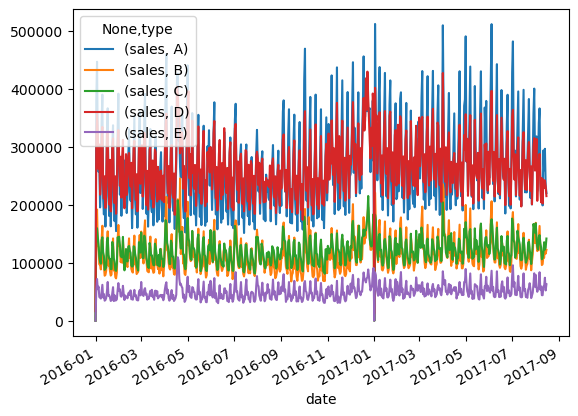

In [55]:
retail_store_df.pivot_table(
    index = ["date"],
    columns = "type",
    aggfunc = {"sales": "sum"}
).plot()

<Axes: xlabel='city'>

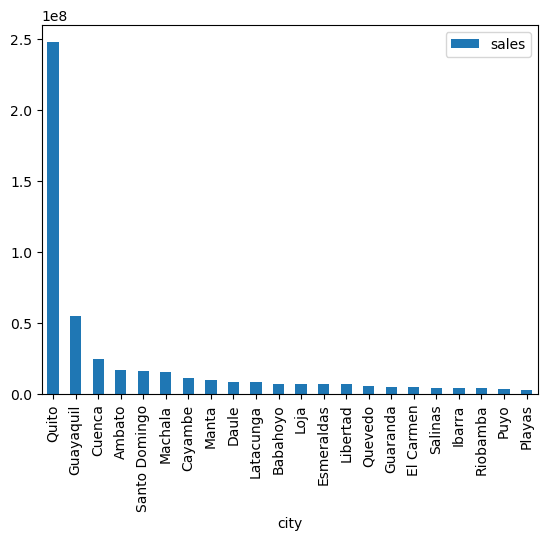

In [71]:
retail_store_df.groupby("city").agg({"sales": "sum"}).sort_values(by="sales", ascending=False).plot.bar()

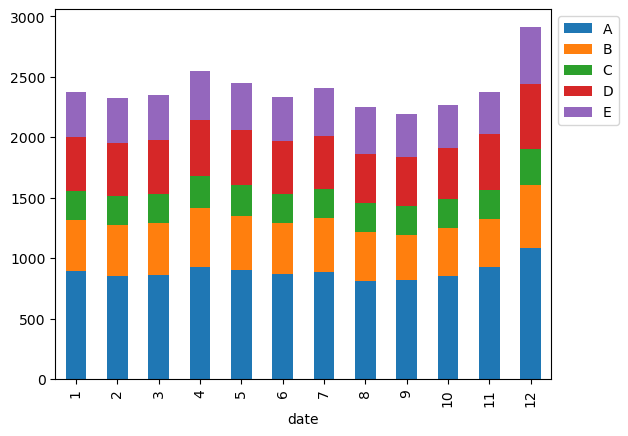

In [69]:
retail_store_df.pivot_table(
    index = "type",
    columns = retail_store_df["date"].dt.month,
    values = "sales",
    aggfunc = "mean"
).T.plot.bar(stacked = True).legend(bbox_to_anchor=(1, 1))